#   Auxiliando o diagnóstico do câncer de próstata | Parte 1
![](prostate.png)

## Números do câncer de próstata no Brasil

- As estimativas apontam **68.220** novos casos em 2018;
- Esses valores correspondem a um risco estimado de **66,12** casos novos a cada **100 mil homens**;
- É a **segunda maior** causa de morte por câncer em **homens** no Brasil, com mais de **14 mil óbitos**.

Fonte: http://www.saude.gov.br/saude-de-a-z/cancer-de-prostata

## Dados do câncer de próstata no Brasil

- http://dados.gov.br/dataset
- http://www2.datasus.gov.br/

In [1]:
import pandas as pd
data = pd.read_csv('prostata.csv', skiprows=2, sep=';')
print(data.shape)
data

(39, 4)


,ANO,OBITO_TOTAL,OBITO_CANCER,PERCENTUAL
0,1979,711742,2204,"0,31"
1,1980,750727,2299,"0,31"
2,1981,750276,2494,"0,33"
3,1982,741614,2545,"0,34"
4,1983,771203,2725,"0,35"
5,1984,809825,2876,"0,36"
6,1985,788231,2970,"0,38"
7,1986,811556,3088,"0,38"
8,1987,799621,3275,"0,41"
9,1988,834338,3523,"0,42"


### Criando gráficos com matplotlib

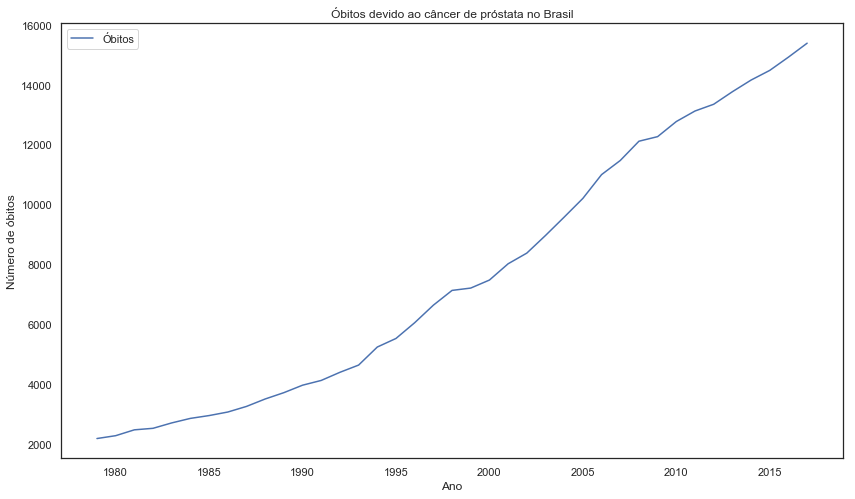

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(data['ANO'], data['OBITO_CANCER'], label='Óbitos')
plt.title('Óbitos devido ao câncer de próstata no Brasil')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')
plt.legend(loc='best')
plt.show()

### Criando gráficos com plotly

- https://plot.ly/python/line-charts/

In [3]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()


fig.add_trace(go.Scatter(x=data['ANO'], y=data['OBITO_CANCER'], mode='lines',
        name='Óbitos',
        line=dict(color='rgb(52,56,56)', width=2),
        connectgaps=True,
    ))

# endpoints
fig.add_trace(go.Scatter(
        x=[data['ANO'][0], data['ANO'][38]],
        y=[data['OBITO_CANCER'][0], data['OBITO_CANCER'][38]],
        mode='markers',
        marker=dict(color='rgb(52,56,56)', size=6)
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels

# labeling the left_side of the plot
annotations.append(dict(xref='paper', x=0.05, y=data['OBITO_CANCER'][0],
                                  xanchor='right', yanchor='middle',
                                  text='{}'.format(data['OBITO_CANCER'][0]),
                                  font=dict(family='Arial',
                                            size=12),
                                  showarrow=False))
# labeling the right_side of the plot
annotations.append(dict(xref='paper', x=0.95, y=data['OBITO_CANCER'][38],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(data['OBITO_CANCER'][38]),
                                  font=dict(family='Arial',
                                            size=12),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.05, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Óbitos por câncer de próstata no Brasil',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fonte: Ministério da Saúde (DATASUS)',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

In [7]:
fig.write_image("fig1.png")

ValueError: Image generation requires the psutil package.

Install using pip:
    $ pip install psutil

Install using conda:
    $ conda install psutil


### Dicas para usar dados públicos de saúde do Brasil

- http://dados.gov.br/
- http://www2.datasus.gov.br/
- https://bigdata.icict.fiocruz.br/
- https://cliquesus.com.br/#home

## Como o diagnóstico é feito hoje?

- Exame de toque retal;
- Exame de PSA;
- Para confirmar o câncer de próstata é preciso fazer uma biópsia.

## Fatores de risco 

- **Idade**: o risco aumenta com o avançar da idade. No Brasil, a cada dez homens diagnosticados com câncer de próstata, nove têm mais de 55 anos.

- **Histórico de câncer na família**: homens cujo o pai, avô ou irmão tiveram câncer de próstata antes dos 60 anos, fazem parte do grupo de risco.

- **Sobrepeso e obesidade**: estudos recentes mostram maior risco de câncer de próstata em homens com peso corporal mais elevado.

## Dataset

- https://www.kaggle.com/sajidsaifi/prostate-cancer 


## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Site: http://viniciusgalvaoia.com.br

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline